In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import xgboost as xgb

In [3]:
%matplotlib inline
plt.rcParams['font.size']=14
plt.rcParams['axes.titlepad']= 8
plt.rcParams['axes.titlesize']= 'medium'
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['axes.facecolor'] = 'white'

In [4]:
data_total = pd.read_csv('Shajanpur_CCE_Extract_One_Stage.csv')
data = data_total.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 41 columns):
USIN                                     162 non-null int64
State                                    162 non-null object
District                                 162 non-null object
Block_Mand                               162 non-null object
Gram_Panch                               162 non-null object
Village                                  162 non-null object
CCE_Date                                 162 non-null object
Lat                                      162 non-null float64
Long                                     162 non-null float64
Target_Cro                               162 non-null object
Crop_Varie                               162 non-null object
Irrigated                                162 non-null object
Any_Stress                               162 non-null object
CCE_Plot_S                               162 non-null object
Biomass_We                              

In [6]:
corr = data.corr()

In [7]:
corr.to_excel("Shajanpur_Corr_30M.xlsx")

In [8]:
corr.Yield_kg_h

USIN                                    -0.419377
Lat                                      0.493326
Long                                     0.514274
Biomass_We                               0.943014
Biomass__M                               0.377078
Grain_Weig                               1.000000
Grain__Mos                               0.375403
Thousand                                 0.060846
Dry_weight                               1.000000
CE_GP_Code                              -0.127742
Yield_kg_h                               1.000000
CCCI_Shajanpur_GS                        0.074520
CWSI_Shajanpur_GS                        0.279380
evi_shajhapur_16_march_2021__gcs_30m    -0.254800
ndvi_shajhapur_16_march_2021__gcs_30m   -0.253180
SM_Shajapur_GS                           0.018414
SM_Shajapur_VS                          -0.145195
UP_Shahjahanpur_min_GS                   0.317366
UP_Shahjahanpur_min_VS                   0.493311
UP_Shahjahanpur_rf_GS                   -0.506779


In [9]:
X = data[['CWSI_Shajanpur_GS','UP_Shahjahanpur_min_GS','UP_Shahjahanpur_min_VS']]
Y = data.Yield_kg_h

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
CWSI_Shajanpur_GS         162 non-null float64
UP_Shahjahanpur_min_GS    162 non-null float64
UP_Shahjahanpur_min_VS    162 non-null float64
dtypes: float64(3)
memory usage: 3.9 KB


In [11]:
# scores=[]
# scores1=[]
# for i in range(100):
#     print(i)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 11, test_size=0.1)
rfp = RandomForestRegressor(n_estimators=14, max_depth=12, min_samples_split=4, random_state=30)
rfp.fit(X_train, Y_train)
x_predp = rfp.predict(X_train)
y_predp = rfp.predict(X_test)
print("Train scores:",r2_score(Y_train, x_predp))
print("Test scores:",r2_score(Y_test, y_predp))
#     scores.append(r2_score(x_predp, Y_train))
#     scores1.append(r2_score(Y_test, y_predp))
devsp = ((y_predp-Y_test)/Y_test)*100
# print(np.max(scores1))
print(devsp)
print("Mean Deviation: ", np.mean(np.abs(devsp)))

Train scores: 0.784198006601
Test scores: 0.7055225982
26     24.954166
69      4.676925
118    17.238284
152     0.281000
52     21.820996
146     3.590833
22    -12.754479
104     1.167150
150    -7.757086
56     13.669987
51     17.198554
160    13.689114
151    -8.091121
41      7.371709
85     21.151007
126    33.831208
128    13.080035
Name: Yield_kg_h, dtype: float64
Mean Deviation:  13.07786197697976


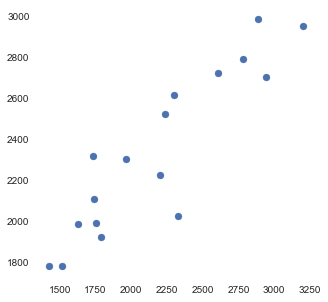

In [12]:
plt.scatter(Y_test, y_predp)

In [13]:
# scores=[]
# scores1=[]
# for i in np.arange(0.1,1,0.01):
#     print(i)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 71, test_size=0.1)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.39,
                max_depth = 7, alpha = 17, n_estimators = 14)
xg_reg.fit(X_train,Y_train)

x_pred_xgbp = xg_reg.predict(X_train)
y_pred_xgbp = xg_reg.predict(X_test)
print("Train score: ",r2_score(Y_train, x_pred_xgbp))
print("Test score: ",r2_score(Y_test, y_pred_xgbp))
#     scores.append(r2_score(Y_train, x_pred_xgbp))
#     scores1.append(r2_score(Y_test, y_pred_xgbp))
devs_xgbp = ((y_pred_xgbp-Y_test)/Y_test)*100
# print(np.max(scores1))
print(devs_xgbp)
print("Mean Deviation: ", np.mean(np.abs(devs_xgbp)))

Train score:  0.900542221162
Test score:  0.483285828317
106     0.703405
34     31.019122
159     0.875214
68     -2.555301
135     0.509178
83     -0.058748
147    34.328881
130     2.102233
143    -6.281961
89     -5.716001
4      28.679742
59     -6.479759
73     16.473804
38     -9.204563
50      7.215656
129   -19.721055
136   -16.669939
Name: Yield_kg_h, dtype: float64
Mean Deviation:  11.093797853970015


D:\Anaconda\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
D:\Anaconda\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


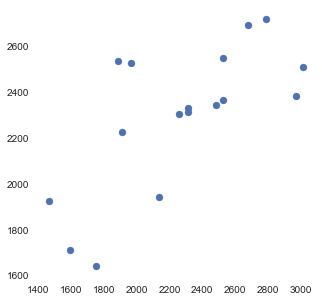

In [14]:
plt.scatter(Y_test, y_pred_xgbp)

# Final model is RF

In [15]:
output = data_total.iloc[X_test.index].copy()

output['Predictions'] = y_predp
output.reset_index(drop=True, inplace=True)
output.to_excel("Shajanpur_30M_Predictions.xlsx")

###  Analysis

In [36]:
data = pd.read_csv('Train_data/Aurangabad_CCE_Extract_One_Stage_30m.csv')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 31 columns):
USIN                                              162 non-null int64
State                                             162 non-null object
District                                          162 non-null object
Block_Mand                                        162 non-null object
Gram_Panch                                        162 non-null object
Village                                           162 non-null object
CE_GP_Code                                        162 non-null int64
CE_G_P                                            161 non-null object
CCE_Date                                          162 non-null object
Lat                                               162 non-null float64
Long                                              162 non-null float64
Target_Cro                                        162 non-null object
State_1                                           162 n

In [38]:
data.drop(['USIN','State','District','Block_Mand','Gram_Panch','Village','CE_GP_Code','CE_G_P',
           'CCE_Date','Lat','Long','Target_Cro','State_1','District_1','Sub_Distri','Village_1',
           'UID','Remark'],axis=1, inplace=True)

In [39]:
### Thresholding is applied for outlier treatment
low_thresh = np.mean(data.Yield_kg_h)-2*np.std(data.Yield_kg_h)
upp_thresh = np.mean(data.Yield_kg_h)+2*np.std(data.Yield_kg_h)

In [40]:
low_thresh,upp_thresh

(1290.495569007717, 4243.437764325617)

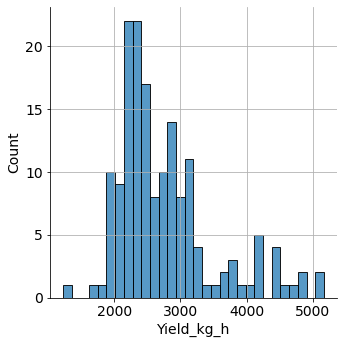

In [41]:
sns.displot(data.Yield_kg_h, bins=30)

In [42]:
data = data[np.logical_and(data.Yield_kg_h > low_thresh, data.Yield_kg_h < upp_thresh)]

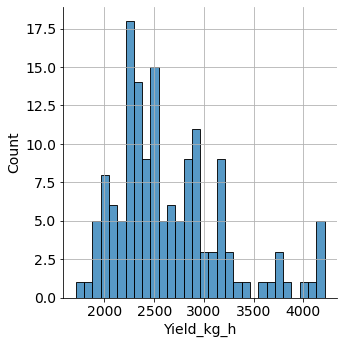

In [43]:
sns.displot(data.Yield_kg_h, bins=30)

In [44]:
data.info()
# print(data.MP_Sagar_rf_GS)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 161
Data columns (total 13 columns):
Yield_kg_h                                        151 non-null float64
arugabad_01_03_jan_soil_moisture_mosaic_subset    151 non-null float64
aurangabad_04_march_soil_moisture                 151 non-null float64
BH_Aurangabad_max_GS                              151 non-null float64
BH_Aurangabad_max_VS                              151 non-null float64
BH_Aurangabad_min_GS                              151 non-null float64
BH_Aurangabad_min_VS                              151 non-null float64
BH_Aurangabad_rf_GS                               151 non-null float64
BH_Aurangabad_rf_VS                               151 non-null float64
CCCI_Aurangabad_30                                151 non-null float64
CWSI_Aurangabad_30                                151 non-null float64
EVI_sen2_aurangabad_20210224_gcs_30               151 non-null float64
NDVI_sen2_aurangabad_20210224_gcs_30       

In [45]:
X = data.drop(['Yield_kg_h'],axis=1)
Y = data.Yield_kg_h

In [51]:
scores=[]
scores1=[]
for i in range(1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 82, test_size=0.1)
    rf = RandomForestRegressor(n_estimators=10, max_depth=12, min_samples_split=3, random_state=69)
    rf.fit(X_train, Y_train)
    x_pred = rf.predict(X_train)
    y_pred = rf.predict(X_test)
    print('Train score:',i, r2_score(Y_train, x_pred))
    print('Test score:',i, r2_score(Y_test, y_pred))
    scores.append(r2_score(Y_train, x_pred))
    scores1.append(r2_score(Y_test, y_pred))
devs = ((y_pred-Y_test)/Y_test)*100
print(np.max(scores1))
print("Mean Deviation: ", np.mean(np.abs(devs)))
print(devs)

Train score: 0 0.7442356786480518
Test score: 0 0.6199354376967916
0.6199354376967916
Mean Deviation:  10.183178169043016
2      16.563701
55    -12.168802
124    -6.959515
148    -4.122807
132    -3.790992
34    -19.065554
32      9.347212
47     -7.000576
80    -13.568980
91     -7.958527
101     0.705576
13     12.708705
20     14.339420
7     -11.747341
120    -5.922229
67     16.960913
Name: Yield_kg_h, dtype: float64


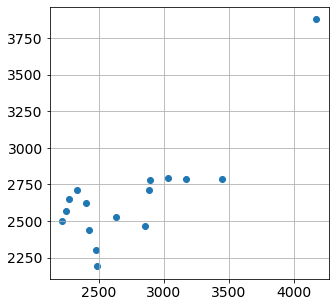

In [52]:
plt.scatter(Y_test,y_pred)

In [60]:
scores=[]
scores1=[]
for i in np.arange(1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 71, test_size=0.1)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.96,
                    max_depth = 5, alpha = 10, n_estimators = 25)
    xg_reg.fit(X_train,Y_train)

    x_pred_xgb = xg_reg.predict(X_train)
    y_pred_xgb = xg_reg.predict(X_test)
    print("Train score: ", i,r2_score(x_pred_xgb,Y_train))
    print("Test score: ",i, r2_score(Y_test, y_pred_xgb))
    scores.append(r2_score(x_pred_xgb,Y_train))
    scores1.append(r2_score(Y_test, y_pred_xgb))
devs_xgb = ((y_pred_xgb-Y_test)/Y_test)*100
print(np.max(scores1))
print("Mean Deviation: ", np.mean(np.abs(devs_xgb)))
print(devs_xgb)

Train score:  0 0.9999892640049901
Test score:  0 0.47427357645482904
0.47427357645482904
Mean Deviation:  11.345582527936017
141    -9.477272
91     -4.335932
90      1.356974
112    -2.727430
60      0.825308
146    18.222098
4     -26.084286
132     2.544865
144    19.590278
34    -11.214405
74    -25.054528
35     -2.506112
126    19.151652
142   -24.326143
47      0.614528
56    -13.497509
Name: Yield_kg_h, dtype: float64


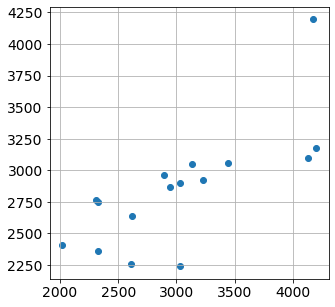

In [61]:
plt.scatter(Y_test, y_pred_xgb)

### The score didn't improved 

output = data_total.iloc[X_test.index].copy()

output['Predictions'] = y_pred
output.reset_index(drop=True, inplace=True)
output.to_excel("Ganganagar_30M_Predictions.xlsx")

### Final Predictions

In [16]:
data1 = pd.read_csv('30M_INPUT_FOR_YIELD_MAP/Shajahanpur_CWSI_30_LISS4.csv')

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541437 entries, 0 to 3541436
Data columns (total 16 columns):
pointid                                  int64
grid_code                                float64
POINT_X                                  float64
POINT_Y                                  float64
CCCI_Shajanpur_GS                        float64
CWSI_Shajanpur_GS                        float64
evi_shajhapur_16_march_2021__gcs_30m     float64
ndvi_shajhapur_16_march_2021__gcs_30m    float64
SM_Shajapur_GS                           float64
SM_Shajapur_VS                           float64
UP_Shahjahanpur_min_GS                   float64
UP_Shahjahanpur_min_VS                   float64
UP_Shahjahanpur_rf_GS                    float64
UP_Shahjahanpur_rf_VS                    float64
UP_Shajahapur_max_GS                     float64
UP_Shajahapur_max_VS                     float64
dtypes: float64(15), int64(1)
memory usage: 432.3 MB


In [18]:
data1.dropna(inplace=True)
data1.reset_index(drop=True, inplace=True)

In [19]:
X.columns

Index(['CWSI_Shajanpur_GS', 'UP_Shahjahanpur_min_GS',
       'UP_Shahjahanpur_min_VS'],
      dtype='object')

In [34]:
data1['Avg_max'] = (data1.Ganjam_max_GS_30 + data1.Ganjam_max_VS_30)/2
data1['Avg_min'] = (data1.Ganjam_min_GS_30 + data1.Ganjam_min_VS_30)/2
data1['Sum_rf'] = (data1.Ganjam_rf_GS_30 + data1.Ganjam_rf_VS_30)

In [20]:
data2 = data1[['CWSI_Shajanpur_GS', 'UP_Shahjahanpur_min_GS',
       'UP_Shahjahanpur_min_VS']]

In [21]:
data_pred = rfp.predict(data2)

In [22]:
data1['Prediction'] = data_pred
data1['InQuintal'] = data_pred/100

In [23]:
data1.reset_index(drop=True, inplace=True)

In [24]:
data1.to_csv('30M_INPUT_FOR_YIELD_MAP/Shahajhanpur_30m_Prediction_LISS4.csv')

In [25]:
data1.head()

,pointid,grid_code,POINT_X,POINT_Y,CCCI_Shajanpur_GS,CWSI_Shajanpur_GS,evi_shajhapur_16_march_2021__gcs_30m,ndvi_shajhapur_16_march_2021__gcs_30m,SM_Shajapur_GS,SM_Shajapur_VS,UP_Shahjahanpur_min_GS,UP_Shahjahanpur_min_VS,UP_Shahjahanpur_rf_GS,UP_Shahjahanpur_rf_VS,UP_Shajahapur_max_GS,UP_Shajahapur_max_VS,Prediction,InQuintal
0,1,0.327213,80.015069,28.37847,0.553863,0.327213,0.262642,0.307420,0.359080,0.339178,15.080343,8.670574,2.595776,6.720245,30.585459,21.676371,2819.395189,28.193952
1,2,0.319857,80.015371,28.37847,0.546545,0.319857,0.292537,0.335616,0.356562,0.327909,15.080343,8.670574,2.595776,6.720245,30.585459,21.676371,2679.965099,26.799651
2,3,0.326559,80.015069,28.37820,0.585951,0.326559,0.247453,0.283276,0.351739,0.356689,15.080343,8.670574,2.595776,6.720245,30.585459,21.676371,2819.395189,28.193952
3,4,0.317554,80.015371,28.37820,0.545968,0.317554,0.277387,0.323944,0.345682,0.340896,15.080343,8.670574,2.595776,6.720245,30.585459,21.676371,2489.433324,24.894333
4,5,0.292393,80.015674,28.37820,0.516919,0.292393,0.280755,0.328622,0.341743,0.324007,15.080343,8.670574,2.595776,6.720245,30.585459,21.676371,2499.924603,24.999246


In [26]:
np.mean(data1.Prediction)

2423.318778077273

In [28]:
np.mean(data.Yield_kg_h)

2337.3191697469133